## Modelisation with UNET Mini

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config_resized

# config["use_saved_model_path"] = "./model_v4_full_cat_8.h5"
config["val_sample_nb"] = 100
config["train_sample_nb"] = 400
config["epoch"] = 4

n = NotebookProcessor(config)

## Model definition

UNET is lorem ipsum

## Model creation

In [ ]:

def conv_block(input_tensor, num_filters, dropout_rate=0.1):  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_tensor)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    x = Dropout(dropout_rate)(x)  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    return x  
  
def create_model(n_classes, img_width, img_height, img_channels):  
    inputs = Input((img_height, img_width, img_channels))  
  
    # Contraction path  
    c1 = conv_block(inputs, 16)  # Starting with fewer filters  
    p1 = MaxPooling2D((2, 2))(c1)  
      
    c2 = conv_block(p1, 32)  
    p2 = MaxPooling2D((2, 2))(c2)  
  
    c3 = conv_block(p2, 64)  # For mini U-Net, this could be considered as the bottleneck  
  
    # Expansive path   
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)  
    u4 = concatenate([u4, c2])  
    c4 = conv_block(u4, 32)  
       
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)  
    u5 = concatenate([u5, c1])  
    c5 = conv_block(u5, 16)  
       
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c5)  
       
    model = Model(inputs=[inputs], outputs=[outputs])  
    return model  

## Model Stats

In [ ]:
model = create_model(n_classes=config["classes"], img_width=config["width"], img_height=config["height"], img_channels=3)
n.set_model(model)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 256, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 128, 256, 16)         0         ['batch_normalization[0][0

In [ ]:
n.model_fit()


Train steps: 133
Balidation steps: 33

---------------------


Epoch 1/4


2024-02-27 16:36:15.202709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


133/133 [==============================] - 35s 254ms/step - loss: 2.6016 - accuracy: 0.1183 - val_loss: 2.2612 - val_accuracy: 0.1299
Epoch 2/4
133/133 [==============================] - 32s 242ms/step - loss: 2.5864 - accuracy: 0.1195 - val_loss: 2.3606 - val_accuracy: 0.1102
Epoch 3/4
 69/133 [==============>...............] - ETA: 11s - loss: 2.5993 - accuracy: 0.1178

KeyboardInterrupt: 

In [ ]:
n.model_save("model_delete.h5")

/Users/m/dev/6be709c0/oc-ai-engineer/OC/P8/output/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


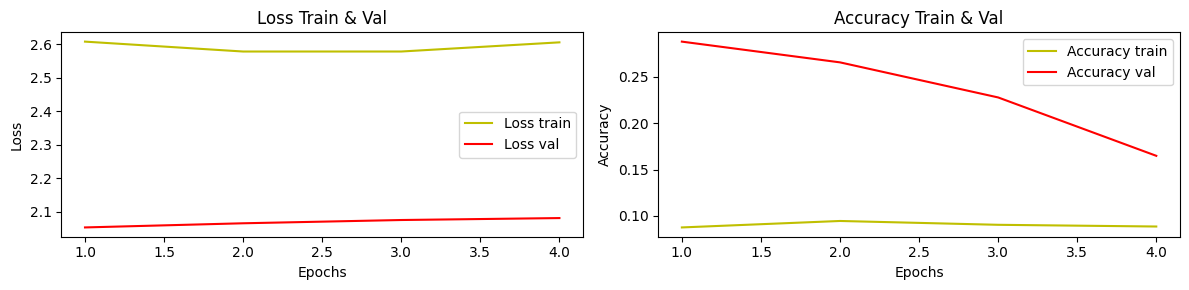

In [ ]:
display_loss_and_accuracy(n.model_fit_history)

1/1 [==============================] - 0s 160ms/step
Instructions for updating:
Use tf.identity with explicit device placement instead.


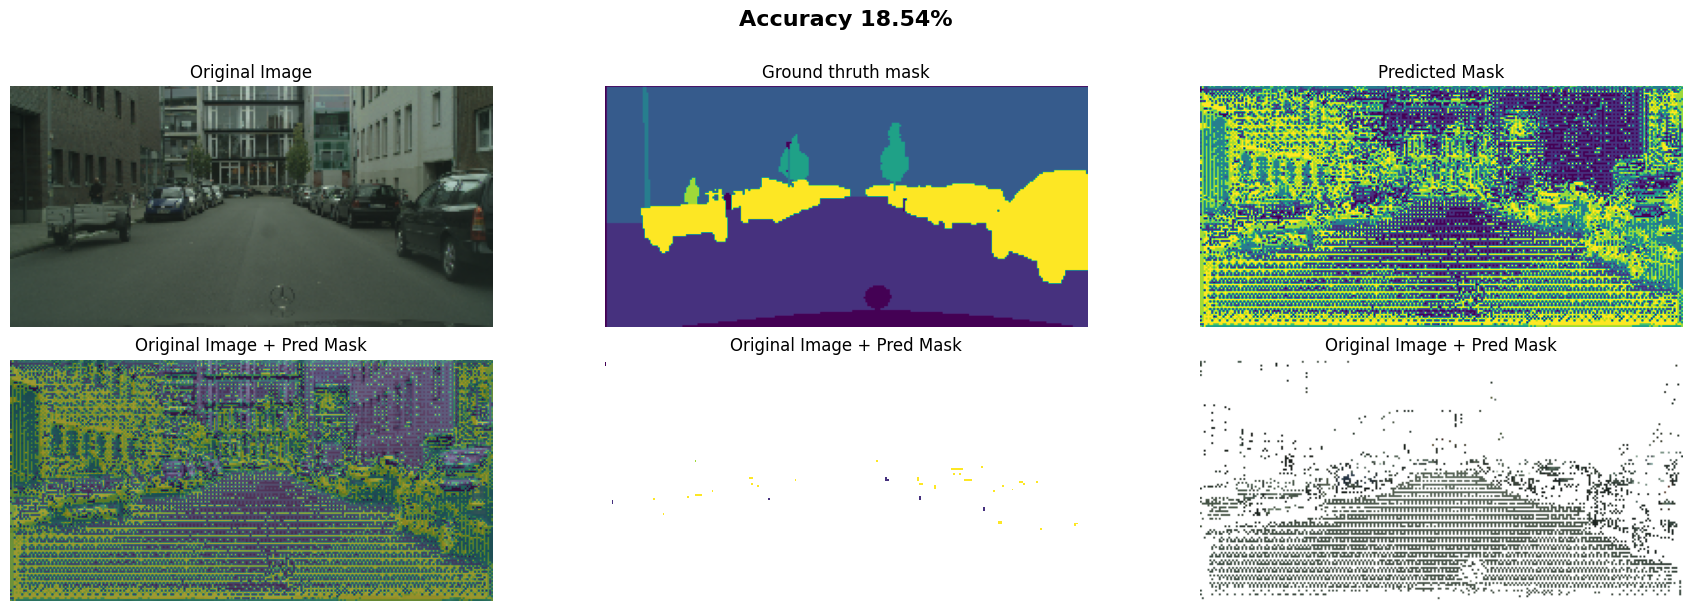

In [ ]:
n.model_predict_with_display_and_accuracy(n.img["val"][3],n.mask["val"][3])

## Model Inference

1/1 [==============================] - 0s 13ms/step
AA (128, 256, 3)
BB (128, 256, 3)


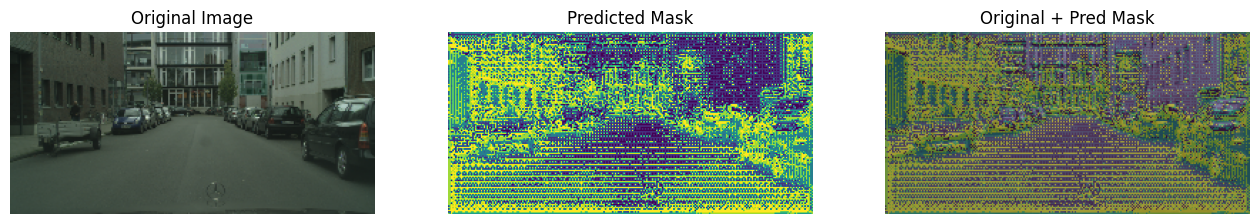

In [ ]:
n.model_predict_with_display(n.img["val"][3])